In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
# import dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [6]:
train['data'] = 'train'
test['data'] = 'test'

In [7]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
data             0
dtype: int64

In [9]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test


In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
data             0
dtype: int64

In [11]:
all_data = pd.concat([train,test],axis=0)

In [12]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [13]:
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


In [14]:
all_data.shape

(1309, 13)

In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [16]:
# Pre - Processing required
# step 1 : check missing data
all_data.isnull().sum()/len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
data            0.000000
dtype: float64

In [17]:
#Cabin data has 77% missing - so we have to drop this column
all_data = all_data.drop(['Cabin'],axis=1)

In [18]:
all_data.isnull().sum()/len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
data            0.000000
dtype: float64

In [19]:
all_data.shape

(1309, 12)

<Axes: ylabel='Age'>

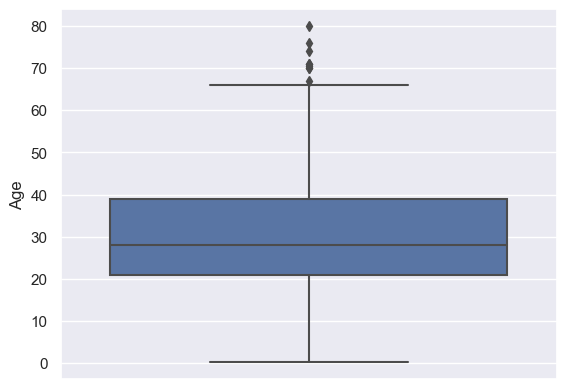

In [20]:
# Age - number
sns.boxplot(y='Age', data = all_data)

In [21]:
all_data['Age'].mean()

29.881137667304014

In [22]:
all_data['Age'].median()

28.0

In [23]:
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())

In [24]:
all_data.isnull().sum()/len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
data            0.000000
dtype: float64

In [25]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'data'],
      dtype='object')

In [26]:
# certain variables are non-significant and hence we have to drop them
# PassengerID, Name, Ticket, Fare

In [27]:
all_data = all_data.drop(['PassengerId','Name','Ticket','Fare'],axis=1)

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1307 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [29]:
all_data['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [30]:
all_data['Embarked'] = all_data['Embarked'].fillna('S')

In [31]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [32]:
# Handling missing value is completed
# Encoding required

In [33]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [34]:
all_data = pd.get_dummies(all_data,columns=['Pclass'])

In [35]:
all_data.head()

,Survived,Sex,Age,SibSp,Parch,Embarked,data,Pclass_1,Pclass_2,Pclass_3
0,0.0,male,22.0,1,0,S,train,False,False,True
1,1.0,female,38.0,1,0,C,train,True,False,False
2,1.0,female,26.0,0,0,S,train,False,False,True
3,1.0,female,35.0,1,0,S,train,True,False,False
4,0.0,male,35.0,0,0,S,train,False,False,True


In [36]:
all_data = pd.get_dummies(all_data,columns=['Sex'])

In [37]:
all_data.head()

,Survived,Age,SibSp,Parch,Embarked,data,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.0,22.0,1,0,S,train,False,False,True,False,True
1,1.0,38.0,1,0,C,train,True,False,False,True,False
2,1.0,26.0,0,0,S,train,False,False,True,True,False
3,1.0,35.0,1,0,S,train,True,False,False,True,False
4,0.0,35.0,0,0,S,train,False,False,True,False,True


In [38]:
all_data = pd.get_dummies(all_data,columns=['Embarked'])

In [39]:
all_data.head()

,Survived,Age,SibSp,Parch,data,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,train,False,False,True,False,True,False,False,True
1,1.0,38.0,1,0,train,True,False,False,True,False,True,False,False
2,1.0,26.0,0,0,train,False,False,True,True,False,False,False,True
3,1.0,35.0,1,0,train,True,False,False,True,False,False,False,True
4,0.0,35.0,0,0,train,False,False,True,False,True,False,False,True


In [40]:
# Dummy variable ( n-1)
all_data = all_data.drop(['Pclass_1', 'Sex_female', 'Embarked_C'], axis=1)

In [41]:
all_data.head()

,Survived,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,train,False,True,True,False,True
1,1.0,38.0,1,0,train,False,False,False,False,False
2,1.0,26.0,0,0,train,False,True,False,False,True
3,1.0,35.0,1,0,train,False,False,False,False,True
4,0.0,35.0,0,0,train,False,True,True,False,True


In [42]:
all_data['Parch'].value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

<Axes: ylabel='SibSp'>

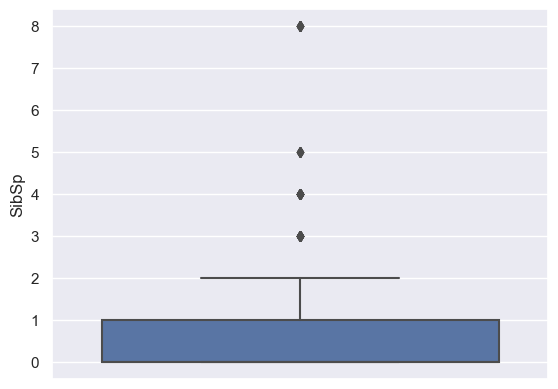

In [43]:
sns.boxplot(y='SibSp', data=all_data)

In [44]:
# Outlier treatment - there is no outlier found in the dataset (Age range is correct)
# since it's logistic regression, hence there is no need to handle outlier

In [45]:
# Feature Scaling : Hold it, if your accuracy is not good, then we have to do feature scaling as well

In [46]:
train.duplicated().sum()

0

In [47]:
test.duplicated().sum()

0

In [48]:
# Segregate train and test
train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [49]:
train.shape

(891, 10)

In [50]:
test.shape

(418, 10)

In [51]:
train.head()

,Survived,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,train,False,True,True,False,True
1,1.0,38.0,1,0,train,False,False,False,False,False
2,1.0,26.0,0,0,train,False,True,False,False,True
3,1.0,35.0,1,0,train,False,False,False,False,True
4,0.0,35.0,0,0,train,False,True,True,False,True


In [52]:
test.head()

,Survived,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,NaN,34.5,0,0,test,False,True,True,True,False
1,NaN,47.0,1,0,test,False,True,False,False,True
2,NaN,62.0,0,0,test,True,False,True,True,False
3,NaN,27.0,0,0,test,False,True,True,False,True
4,NaN,22.0,1,1,test,False,True,False,False,True


In [53]:
train = train.drop(['data'],axis=1)
test = test.drop(['data'],axis=1)

In [54]:
train.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,False,True,True,False,True
1,1.0,38.0,1,0,False,False,False,False,False
2,1.0,26.0,0,0,False,True,False,False,True
3,1.0,35.0,1,0,False,False,False,False,True
4,0.0,35.0,0,0,False,True,True,False,True


In [55]:
test.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,NaN,34.5,0,0,False,True,True,True,False
1,NaN,47.0,1,0,False,True,False,False,True
2,NaN,62.0,0,0,True,False,True,True,False
3,NaN,27.0,0,0,False,True,True,False,True
4,NaN,22.0,1,1,False,True,False,False,True


In [56]:
# split data into independent and dependant variables 
x = train.drop(['Survived'], axis =1)
y = train['Survived']

In [57]:
x.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,False,True,True,False,True
1,38.0,1,0,False,False,False,False,False
2,26.0,0,0,False,True,False,False,True
3,35.0,1,0,False,False,False,False,True
4,35.0,0,0,False,True,True,False,True


In [58]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [59]:
x1 = test.drop(['Survived'], axis =1)
y1 = test['Survived']

In [60]:
x1.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,False,True,True,True,False
1,47.0,1,0,False,True,False,False,True
2,62.0,0,0,True,False,True,True,False
3,27.0,0,0,False,True,True,False,True
4,22.0,1,1,False,True,False,False,True


In [61]:
y1.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Survived, dtype: float64

In [62]:
# Last preprocessing part - Imbalance data
# its balanced data set : Min *2 > Max
y.value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [63]:
# This is all about preprocessing part

# Exploratory Data Analysis - EDA

In [64]:
for i in all_data.columns:
    print("****************************************************", i , 
          "*****************************************************************")
    print()
    print(set(all_data[i].tolist()))
    print()

**************************************************** Survived *****************************************************************

{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

C:\Users\Lovekesh\AppData\Local\Temp\ipykernel_27300\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])
C:\Users\Lovekesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


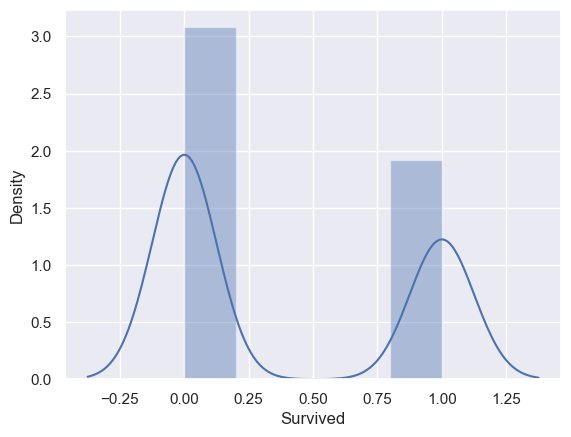

C:\Users\Lovekesh\AppData\Local\Temp\ipykernel_27300\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])
C:\Users\Lovekesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


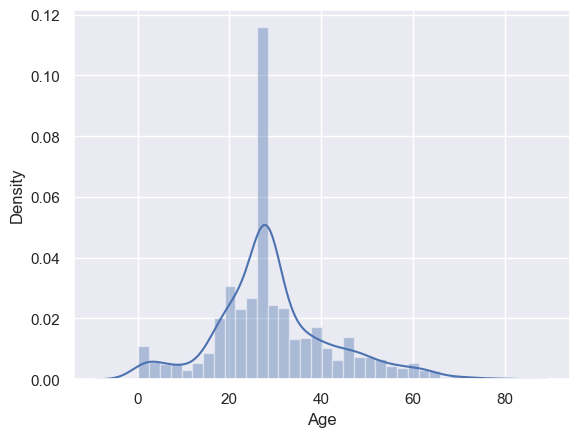

C:\Users\Lovekesh\AppData\Local\Temp\ipykernel_27300\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])
C:\Users\Lovekesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


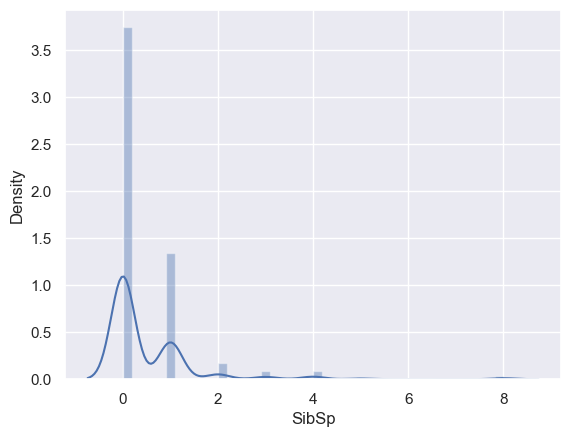

C:\Users\Lovekesh\AppData\Local\Temp\ipykernel_27300\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])
C:\Users\Lovekesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


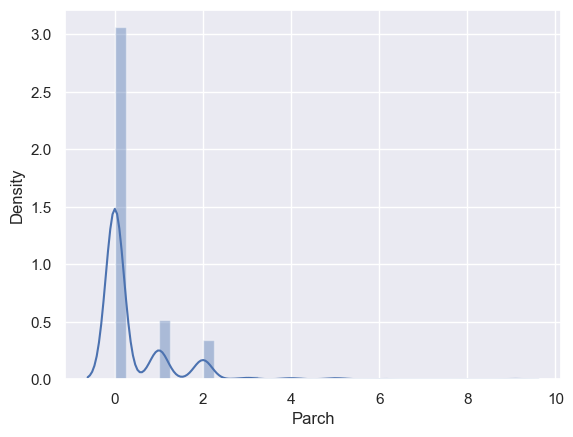

C:\Users\Lovekesh\AppData\Local\Temp\ipykernel_27300\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])
C:\Users\Lovekesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


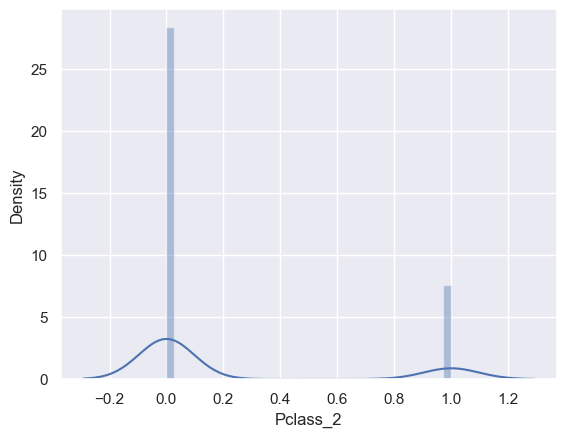

C:\Users\Lovekesh\AppData\Local\Temp\ipykernel_27300\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])
C:\Users\Lovekesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


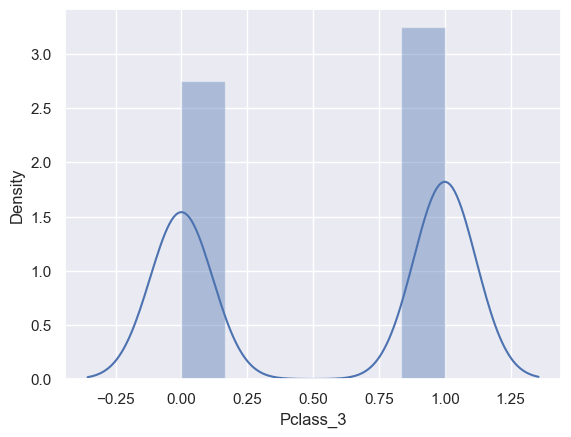

C:\Users\Lovekesh\AppData\Local\Temp\ipykernel_27300\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])
C:\Users\Lovekesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


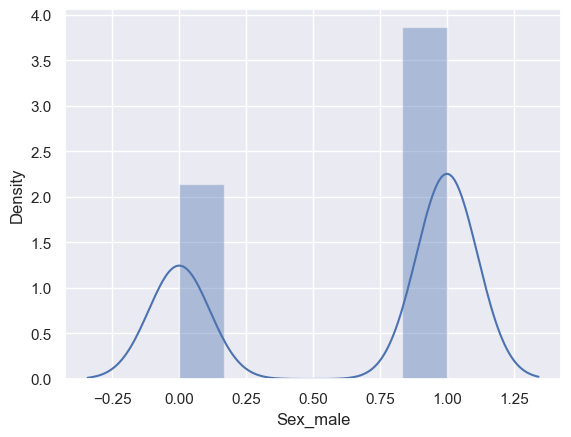

C:\Users\Lovekesh\AppData\Local\Temp\ipykernel_27300\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])
C:\Users\Lovekesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


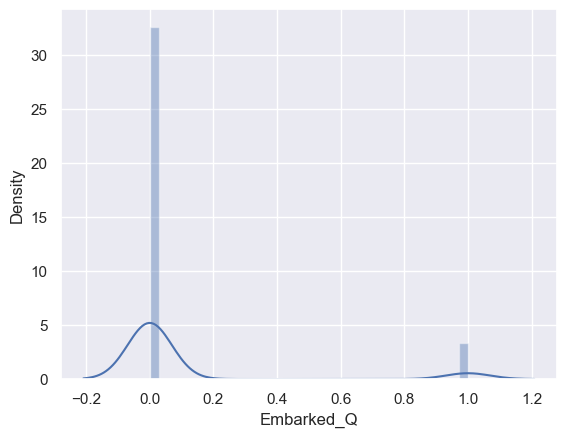

C:\Users\Lovekesh\AppData\Local\Temp\ipykernel_27300\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])
C:\Users\Lovekesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


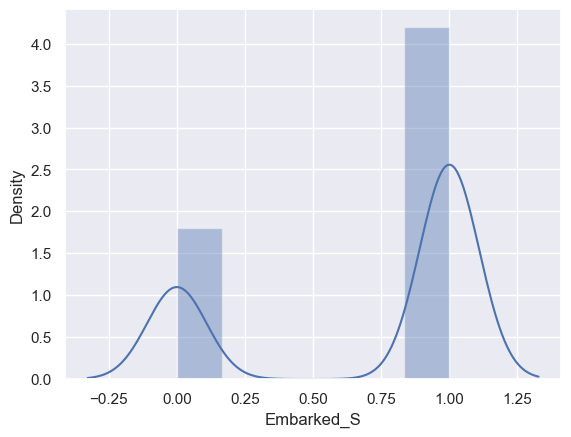

In [65]:
def distplots(col):
    sns.distplot(all_data[col])
    plt.show()
    
for i in list(all_data.select_dtypes(exclude=['object']).columns):
    distplots(i)

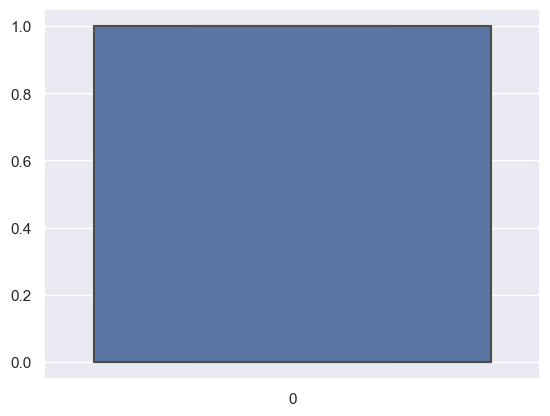

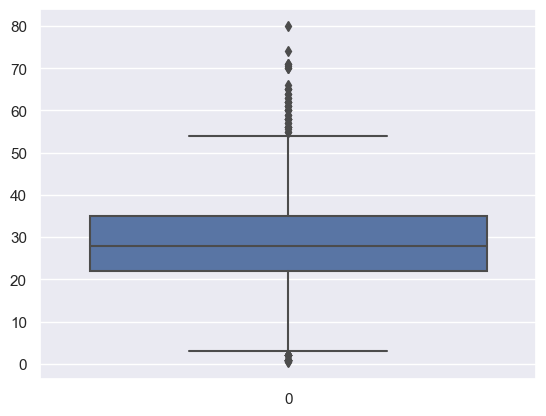

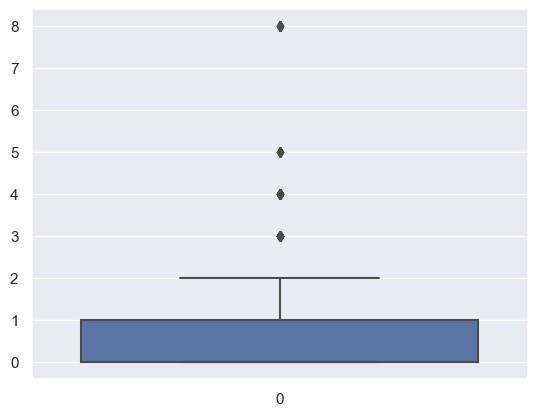

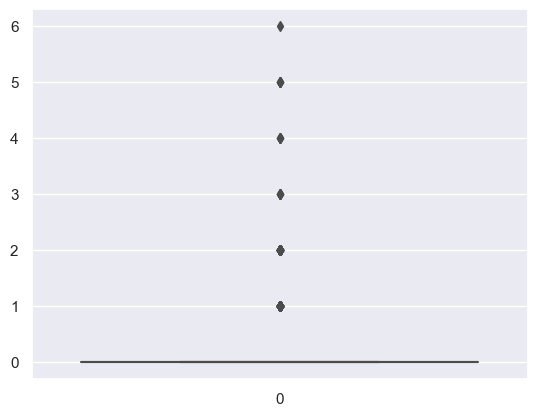

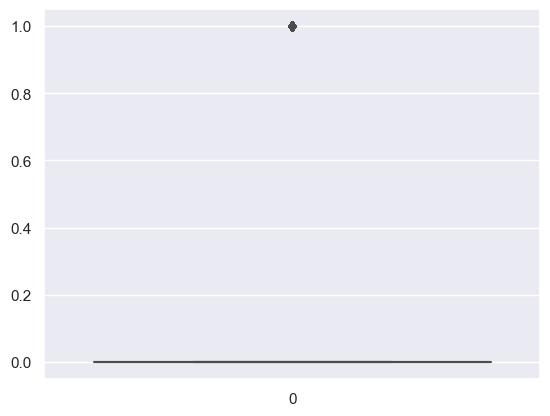

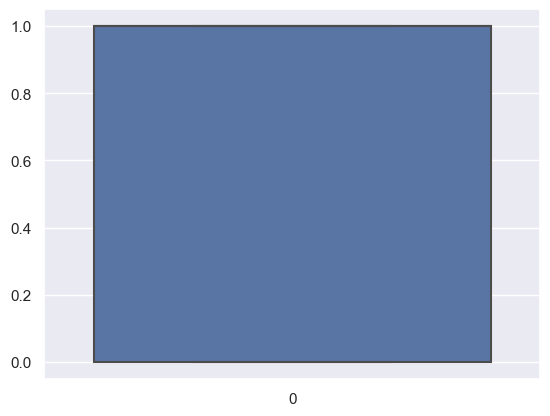

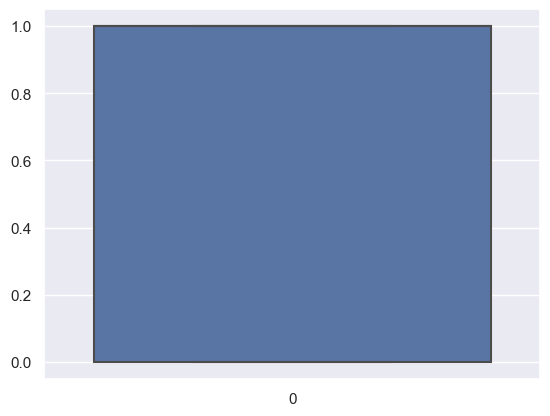

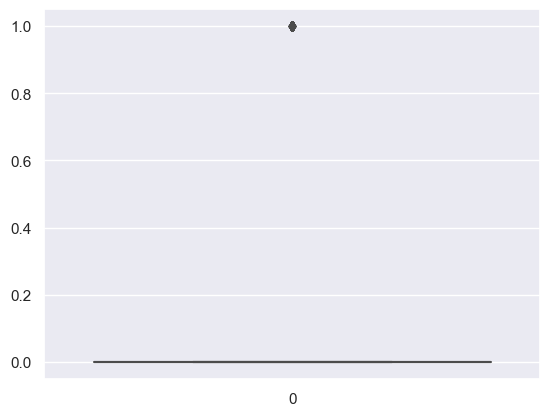

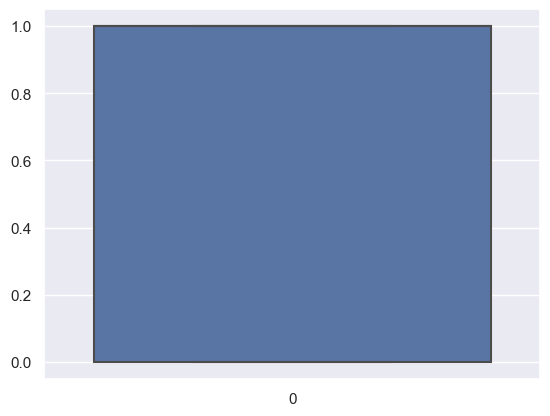

In [69]:
def boxplots(col):
    sns.boxplot(train[col])
    plt.show()
    
for i in list(train.select_dtypes(exclude=['object']).columns):
    boxplots(i)

<Axes: >

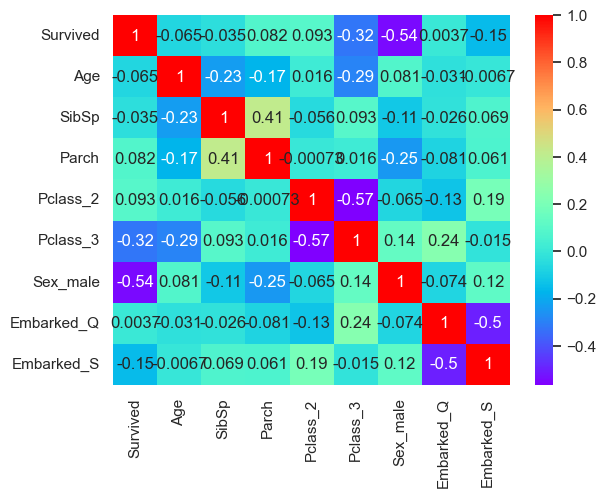

In [68]:
sns.heatmap(train.corr(), annot=True, cmap='rainbow')

C:\Users\Lovekesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lovekesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lovekesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lovekesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

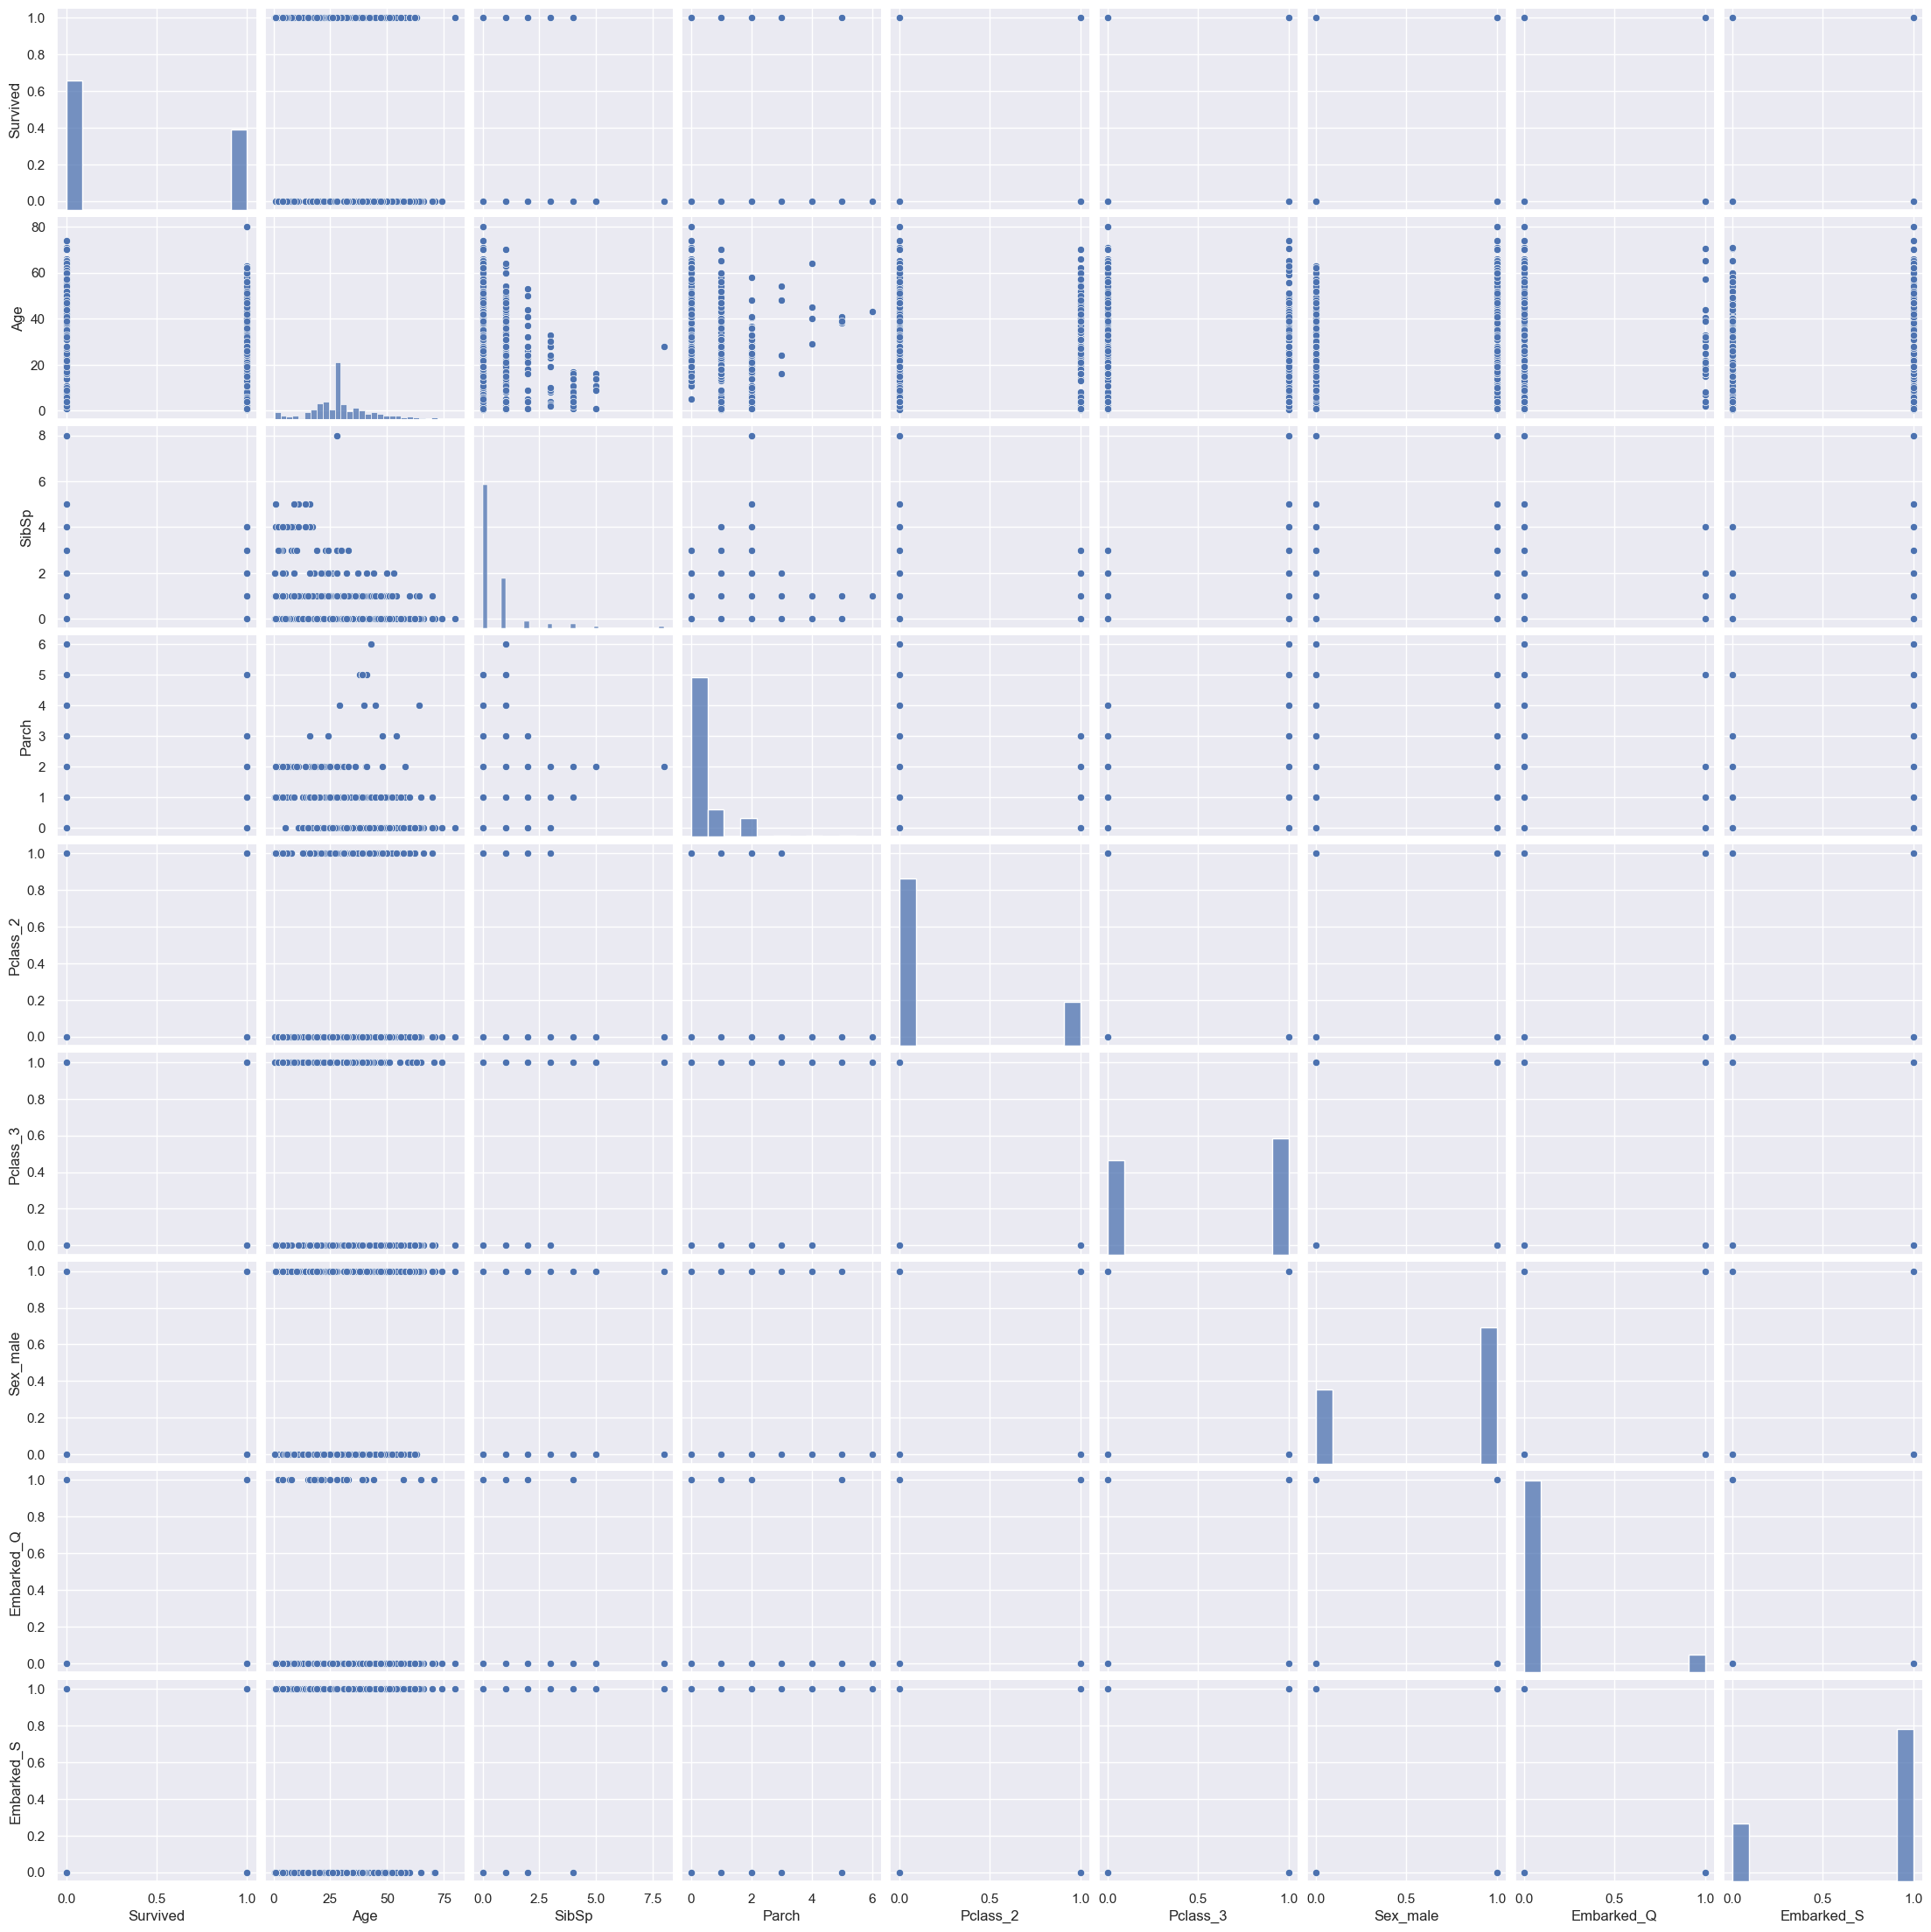

In [70]:
sns.pairplot(train)

In [ ]:
# Use pandas profiling - please do it 

In [72]:
# split the data in training and test
# Training the building a model and test for predicting the model performance
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [73]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


# Building logistic Regression Model

In [74]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

C:\Users\Lovekesh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
# Validate result
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

# Evaluate the model result

In [76]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [78]:
print("Confusion Matrix")
confusion_matrix(y_test, y_pred_test)

Confusion Matrix


array([[89, 10],
       [24, 56]], dtype=int64)

In [79]:
(89+56)/(89+10+24+56)

0.8100558659217877

In [81]:
print("classification_report")
print(classification_report(y_test, y_pred_test))

classification_report
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        99
         1.0       0.85      0.70      0.77        80

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [83]:
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("*************"*5)
print("Test Accuracy", accuracy_score(y_test,y_pred_test))

Training Accuracy 0.8089887640449438
*****************************************************************
Test Accuracy 0.8100558659217877


In [84]:
x1.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,False,True,True,True,False
1,47.0,1,0,False,True,False,False,True
2,62.0,0,0,True,False,True,True,False
3,27.0,0,0,False,True,True,False,True
4,22.0,1,1,False,True,False,False,True


In [85]:
y1.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Survived, dtype: float64

In [86]:
# Last part, we have to predict the test data, whether traveller survived or not
final_result = logit_model.predict(x1)

In [87]:
final_result

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [88]:
final_report = pd.concat([x1, pd.DataFrame(final_result)],axis=1)

In [89]:
final_report

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,0
0,34.5,0,0,False,True,True,True,False,0.0
1,47.0,1,0,False,True,False,False,True,0.0
2,62.0,0,0,True,False,True,True,False,0.0
3,27.0,0,0,False,True,True,False,True,0.0
4,22.0,1,1,False,True,False,False,True,1.0
...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,False,True,True,False,True,0.0
414,39.0,0,0,False,False,False,False,False,1.0
415,38.5,0,0,False,True,True,False,True,0.0
416,28.0,0,0,False,True,True,False,True,0.0


In [100]:
# How to import my model
# cross validation score - K_Fold method
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logit_model, x_test, y_test, cv = 10)
accuracy

C:\Users\Lovekesh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lovekesh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

array([0.77777778, 0.94444444, 0.88888889, 0.66666667, 0.72222222,
       0.72222222, 0.72222222, 0.83333333, 0.77777778, 0.94117647])

In [94]:
print("Avg Accuracy after doing 10 split", accuracy.mean())
print("***************")
print("Best Accuracy", accuracy[1])

Avg Accuracy after doing 10 split 0.7996732026143791
***************
Best Accuracy 0.9444444444444444


# ROC - AUC

In [95]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.7994949494949495

In [96]:
from sklearn.metrics import roc_curve
fpr,tpr, threshods = roc_curve(y_test, y_pred_test)

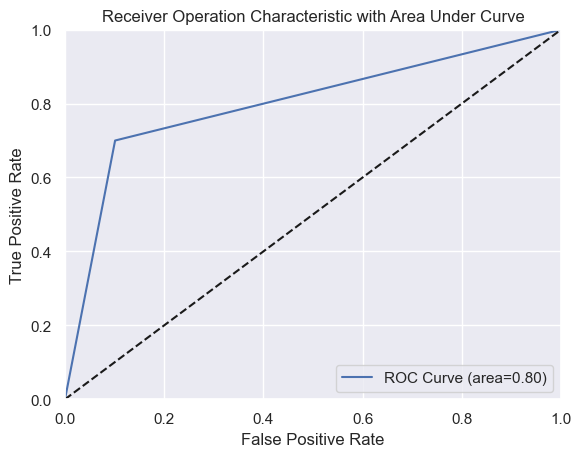

In [98]:
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" %logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operation Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()